# Example notebook for backtesting module

the module is in the testing folder

The idea behind this module is to provide a standardized, and relatively easy to use way to evaluate and compare trading strategies.

https://datalab.stage.internal.santiment.net/lab/workspaces/general/tree/work/Jan/Analysis/Backtest%20Module/testing

In [36]:
from testing.backtest import Backtest # The module in question

import pandas as pd
import san  # Our sanpy module for Santiment data
from api_for_presentation import apikey
san.ApiConfig.api_key = apikey

## First step: Get some  data

In [2]:
data = san.get("ohlcv/bitcoin")
data["returns"]= data.closePriceUsd.pct_change()

data["ma5"] = data.closePriceUsd.rolling(5).mean()
data["ma20"] = data.closePriceUsd.rolling(20).mean()

data = data.dropna()
data.head()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,returns,ma5,ma20
datetime,,,,,,,,,
2018-10-08 00:00:00+00:00,6600.187077,6650.019629,6676.988076,6576.040000,3.986868e+09,1.151246e+11,0.007129,6608.089926,6593.063366
2018-10-09 00:00:00+00:00,6653.080000,6642.640000,6661.410000,6606.936269,3.580810e+09,1.150078e+11,-0.001110,6621.279926,6605.268366
2018-10-10 00:00:00+00:00,6642.121935,6586.192621,6642.121935,6538.960000,3.783206e+09,1.140423e+11,-0.008498,6614.022450,6608.594498
2018-10-11 00:00:00+00:00,6586.740000,6256.240000,6586.740000,6240.502117,5.181640e+09,1.083416e+11,-0.050098,6547.608450,6584.658998
2018-10-12 00:00:00+00:00,6239.250000,6274.580000,6329.373327,6232.198612,3.783500e+09,1.086695e+11,0.002931,6481.934450,6562.401690


## Second step: Define a trading strategy

In [3]:
trades = data["ma5"] > data["ma20"]


- In this case the trades would be True/1 for buy and False/0 for not be invested

- One could also define strategies as 1 for invest, 0 for not being invested and -1 for shorting

- The general backtesting logic at this point is to multiply the trades column with the returns column. 
So 0.05 (5% return) would be set to 0 if trade == 0, would stay the same if trade==1 and turned negative if the trade == -1

- One can also use this to simulate different investment sizes a 0.5 trade represents investing 50% of your money a -0.8 is shorting for 80% of your holdings and a 5 would represent a 5x leverage

## Third step: Generate backtesting object

Returns in Percent:  71.28
Annualized Returns in Percent:  56.65
Annualized Sharpe Raito:  1.27
Maximum Drawdown:  -49.98


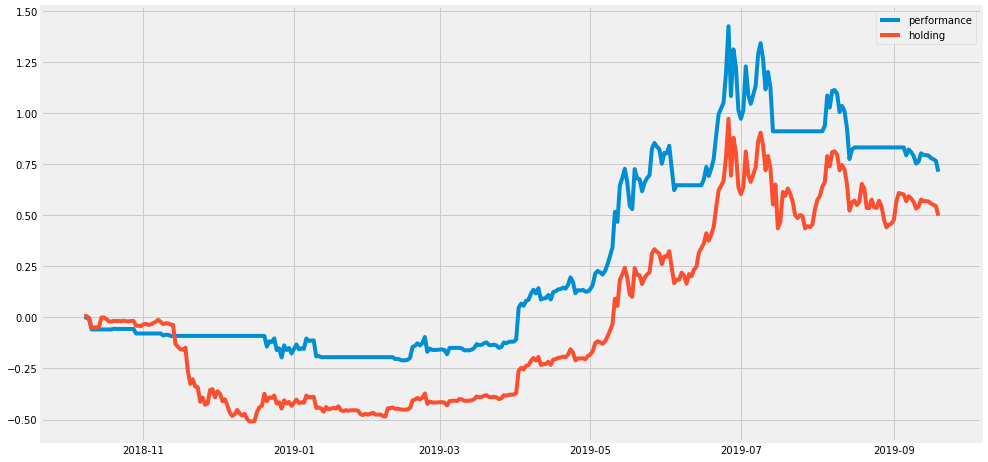

In [6]:
bt = Backtest(data.returns.dropna(), trades)

#bt = Backtest(data.returns.dropna(), trades, lagged=True, transaction_cost = 0.003, percent_invested_per_trade = 1)

# Summary method to get some basic stats and a plot
bt.summary()

## You can also get single stats:

In [7]:
bt.get_return()

71.28

In [8]:
bt.get_annualized_return()

56.65

In [9]:
bt.get_maximum_drawdown()

-49.98

In [10]:
bt.get_sharpe_ratio()

1.27

In [11]:
bt.get_value_at_risk(5)

-4.28

## And do a Monte Carlo simulation to simulate the futher performance of the strategy

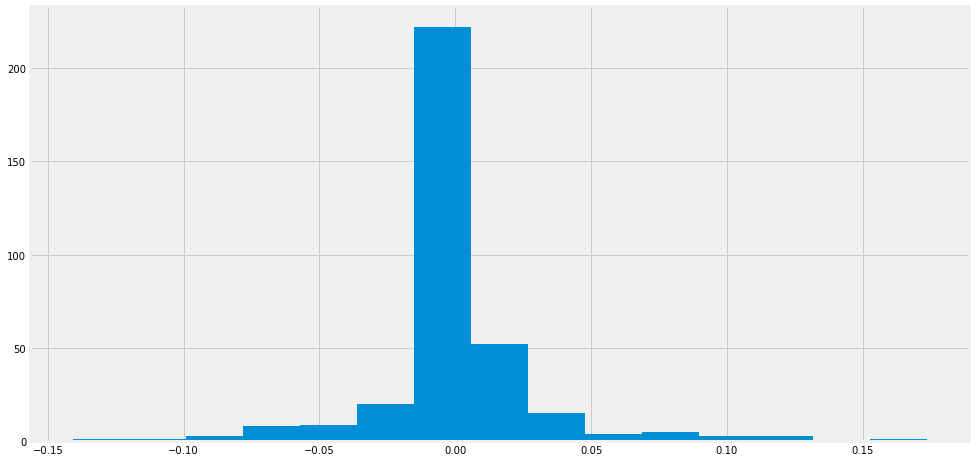

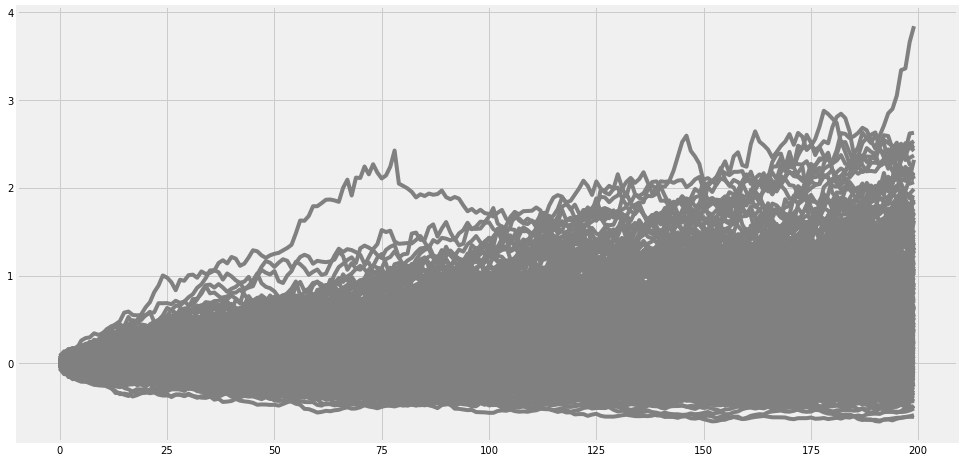

Max:  383.9 %
Min:  -60.91 %


In [12]:
bt.monte_carlo_simulation(simulation_number=500, simulation_range=200)

## Portfolio testing

Generating and comparing multi asset portfolios with Bitcoin performance

In [14]:
from testing.backtest import Portfolio


# Generate the portfolio object:

portf = Portfolio()

#portf2 = Portfolio(start_date="2018-01-01", end_date="2019-08-01", asset_list=["ethereum", "maker"])

In [15]:
# Adding assets to the portfolio
portf.add_project("santiment")
portf.add_project("bitcoin")
portf.add_project("maker")

In [15]:
# Removing assets from the portfolio
portf.remove_project("bitcoin")

In [16]:
portf.show_portfolio().tail()

,santiment,bitcoin,maker
datetime,,,
2019-09-14 00:00:00+00:00,0.038787,-0.000241,0.019329
2019-09-15 00:00:00+00:00,0.034541,-0.000998,0.025084
2019-09-16 00:00:00+00:00,-0.006039,-0.006854,-0.022615
2019-09-17 00:00:00+00:00,0.024304,-0.003456,0.088625
2019-09-18 00:00:00+00:00,-0.008193,-0.001311,0.002314


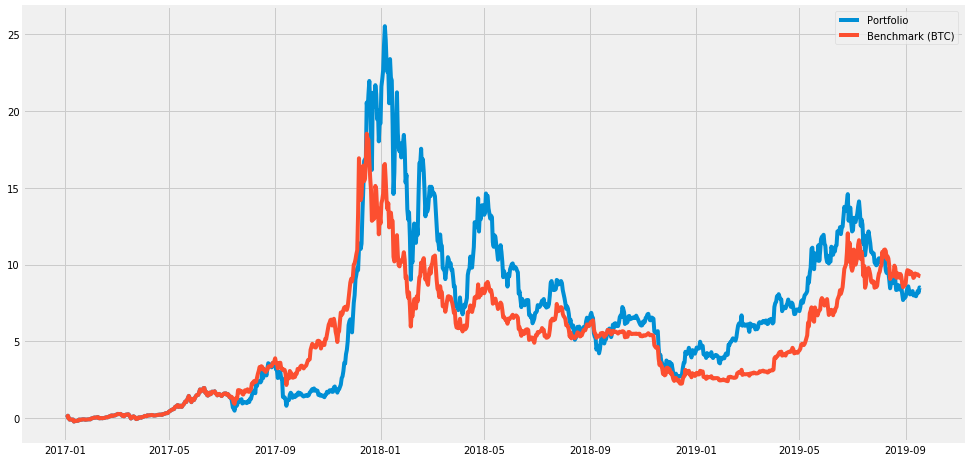

In [17]:
# Plot the performance of the portfolio vs Bitcoin

portf.plot_portfolio()

In [47]:
portf.metrics("daily_active_addresses").tail()

TypeError: 'method' object does not support item assignment

In [7]:
portf.daily_active_addresses

AttributeError: 'Portfolio' object has no attribute 'daily_active_addresses'

## Even Study test

In [13]:
from testing.analysis import eventstudy

In [20]:
d = san.get("ohlcv/ethereum")
d["daa"] = san.get("daily_active_addresses/ethereum")
d = d.dropna()
d.tail()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,daa
datetime,,,,,,,
2019-09-15 00:00:00+00:00,188.302163,189.789130,190.399342,186.447321,6.222875e+09,2.045124e+10,263747.0
2019-09-16 00:00:00+00:00,189.995343,197.113177,198.138491,189.995343,8.242029e+09,2.124317e+10,291476.0
2019-09-17 00:00:00+00:00,197.358709,208.608749,213.691382,196.795865,1.023259e+10,2.248489e+10,284506.0
2019-09-18 00:00:00+00:00,208.441972,211.393035,216.711496,208.347525,9.194635e+09,2.278789e+10,287172.0
2019-09-19 00:00:00+00:00,211.332529,206.840973,211.332529,204.918425,9.316367e+09,2.229805e+10,102420.0


Here are the found events: 


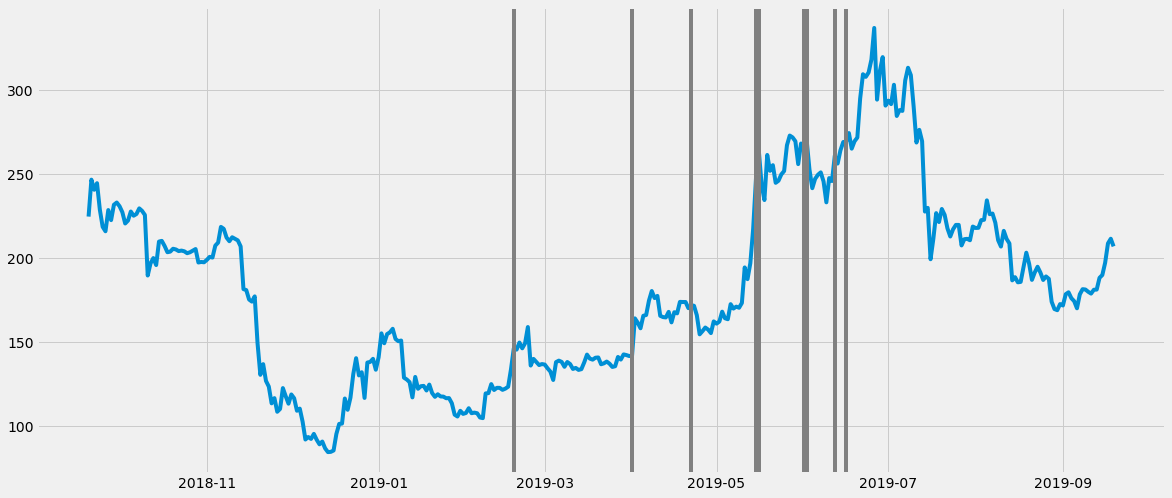



The specified event uccurred 9 times




,2019-02-18 00:00:00+00:00,2019-04-01 00:00:00+00:00,2019-04-22 00:00:00+00:00,2019-05-15 00:00:00+00:00,2019-05-16 00:00:00+00:00,2019-06-01 00:00:00+00:00,2019-06-02 00:00:00+00:00,2019-06-12 00:00:00+00:00,2019-06-16 00:00:00+00:00
0,0.010709,0.003179,0.037440,-0.003854,0.016736,0.060959,0.021691,0.009809,0.061923
1,-0.000357,0.040808,-0.004013,0.016736,0.122243,0.021691,-0.004009,0.005836,-0.007023
2,-0.009493,-0.011148,0.040953,0.122243,-0.035918,-0.004009,-0.008511,-0.021480,0.061566
3,0.005850,0.022099,-0.000457,-0.035918,0.050826,-0.008511,-0.050460,-0.050720,-0.018185
4,0.009499,-0.002840,0.000040,0.050826,0.103138,-0.050460,0.047896,0.061923,0.030912
5,0.083877,-0.004072,-0.021120,0.103138,0.138175,0.047896,-0.010154,-0.007023,0.018675
6,0.093560,0.002235,0.010751,0.138175,0.068205,-0.010154,0.017699,0.061566,0.000265
7,-0.005148,0.156042,-0.002484,0.068205,-0.076684,0.017699,-0.064722,-0.018185,0.019549
8,0.028953,-0.015430,-0.032790,-0.076684,-0.038214,-0.064722,-0.043985,0.030912,-0.033895
9,-0.022891,-0.020933,-0.068546,-0.038214,0.114493,-0.043985,0.022998,0.018675,0.016525




These are the cumulative returns for the time of the event and the 6 time periods before and after the event:


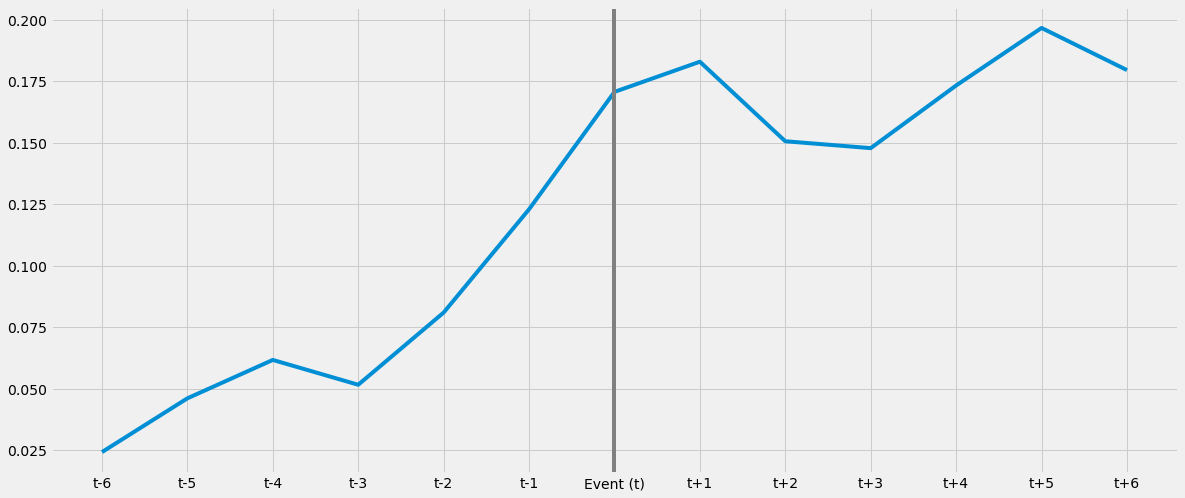

In [35]:
# Entered are the price, a vector containing booleans for wether the even occured and the size of the observed window

eventstudy(d.closePriceUsd, d.daa.pct_change().rolling(8).mean() > 0.04, 6)

# Optionally one can also enter the market returns (BTC) to be removed from the events:
#eventstudy(d.closePriceUsd, d.daa.pct_change().rolling(8).mean() > 0.04, 6, market_returns=san.get("ohlcv/bitcoin").dropna().closePriceUsd.pct_change().iloc[1:])

## Granger Causality test

In [25]:
from testing.analysis import causality

In [32]:
da = pd.DataFrame()

da["price"] = d.closePriceUsd.pct_change()
da["daa"] = d.daa.pct_change()

da = da.dropna()
#da.columns = [["price", "daa"]]

In [33]:
# Data as dataframe with two columns. Tests if first is caused by second
# The second parameter defines the number of lags tested

causality(da, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2548  , p=0.6140  , df_denom=360, df_num=1
ssr based chi2 test:   chi2=0.2569  , p=0.6122  , df=1
likelihood ratio test: chi2=0.2569  , p=0.6123  , df=1
parameter F test:         F=0.2548  , p=0.6140  , df_denom=360, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2272  , p=0.7969  , df_denom=357, df_num=2
ssr based chi2 test:   chi2=0.4608  , p=0.7942  , df=2
likelihood ratio test: chi2=0.4605  , p=0.7944  , df=2
parameter F test:         F=0.2272  , p=0.7969  , df_denom=357, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2472  , p=0.8633  , df_denom=354, df_num=3
ssr based chi2 test:   chi2=0.7562  , p=0.8599  , df=3
likelihood ratio test: chi2=0.7554  , p=0.8601  , df=3
parameter F test:         F=0.2472  , p=0.8633  , df_denom=354, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2176  , p=0.9286  